In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import csv
from sklearn.model_selection import train_test_split

In [2]:
#loading data
file_1="/workspaces/State-of-Health-Estimation-Battery/Dataset/B0005_dis_dataset.csv"
dataset=pd.read_csv(file_1)

In [3]:
Soh=dataset["capacity"]/2

In [4]:
# normalising data
dataset=dataset[["cycle","capacity","voltage_measured","current_measured","temperature_measured","current_load","voltage_load"]]
df_norm = (dataset-dataset.min())/(dataset.max()-dataset.min())
att=["cycle","temperature_measured","capacity","current_load"]

In [5]:
df_norm["Soh"]=Soh

In [6]:
X = df_norm[att]
Y = df_norm[["Soh"]]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0) 

In [8]:
#sorting data wrt to index
X_test = X_test.sort_index(axis=0)
X_train= X_train.sort_index(axis=0)
y_train= y_train.sort_index(axis=0)
y_test = y_test.sort_index(axis=0)

In [10]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [11]:
polyregression = PolynomialFeatures(degree=1)
X_poly = polyregression.fit_transform(X_train)
polyregression.fit(X_poly, y_train)
linear = LinearRegression()
linear.fit(X_poly, y_train)
y_pred_1= linear.predict(polyregression.fit_transform(X_test))

In [12]:
polyregression = PolynomialFeatures(degree=2)
X_poly = polyregression.fit_transform(X_train)
polyregression.fit(X_poly, y_train)
linear = LinearRegression()
linear.fit(X_poly, y_train)
y_pred_2= linear.predict(polyregression.fit_transform(X_test))

In [13]:
polyregression = PolynomialFeatures(degree=3)
X_poly = polyregression.fit_transform(X_train)
polyregression.fit(X_poly, y_train)
linear = LinearRegression()
linear.fit(X_poly, y_train)
y_pred_3= linear.predict(polyregression.fit_transform(X_test))

In [14]:
polyregression = PolynomialFeatures(degree=4)
X_poly = polyregression.fit_transform(X_train)
polyregression.fit(X_poly, y_train)
linear = LinearRegression()
linear.fit(X_poly, y_train)
y_pred_4= linear.predict(polyregression.fit_transform(X_test))

In [15]:
polyregression = PolynomialFeatures(degree=5)
X_poly = polyregression.fit_transform(X_train)
polyregression.fit(X_poly, y_train)
linear = LinearRegression()
linear.fit(X_poly, y_train)
y_pred_5= linear.predict(polyregression.fit_transform(X_test))

In [28]:
def graph_plot(a,model):
    plt.plot(X_test["cycle"],y_test,color='red',label='actual',linewidth=4)
    plt.plot(X_test["cycle"],a,color='cyan',label=model,linewidth=1)
    plt.xlabel("cycle")
    plt.ylabel("SOH")
    rmse="Rmse = "+str(np.sqrt(metrics.mean_squared_error(y_test, a)))
    plt.figtext(0.33, -0.03, rmse, fontsize=10)
    plt.legend(loc="upper right")
    plt.suptitle("polynomial degree :"+model)
    plt.show()
    print(np.sqrt(metrics.mean_squared_error(y_test, a)))

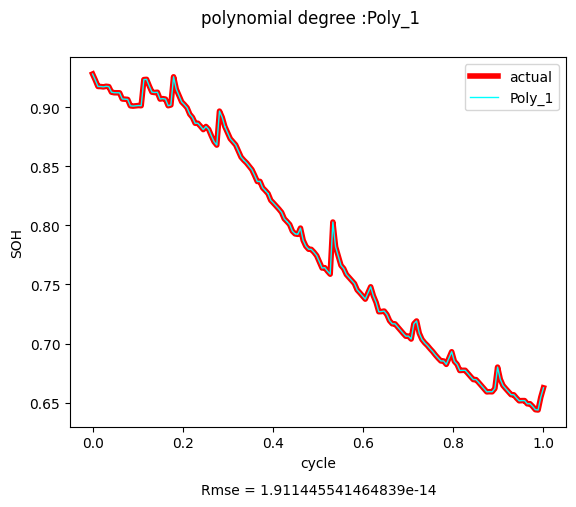

1.911445541464839e-14


In [29]:
graph_plot(y_pred_1,"Poly_1")

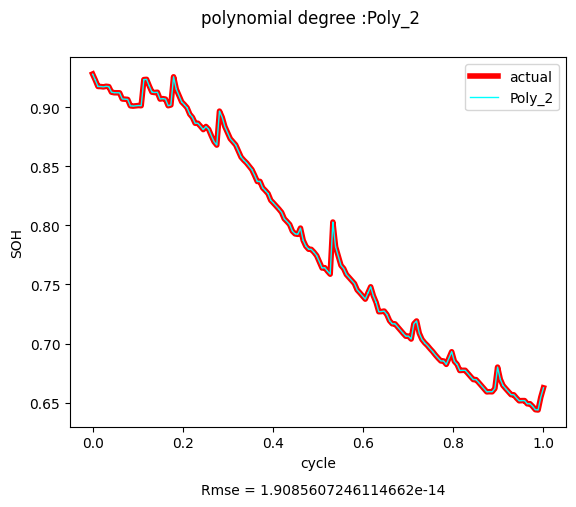

1.9085607246114662e-14


In [30]:
graph_plot(y_pred_2,"Poly_2")

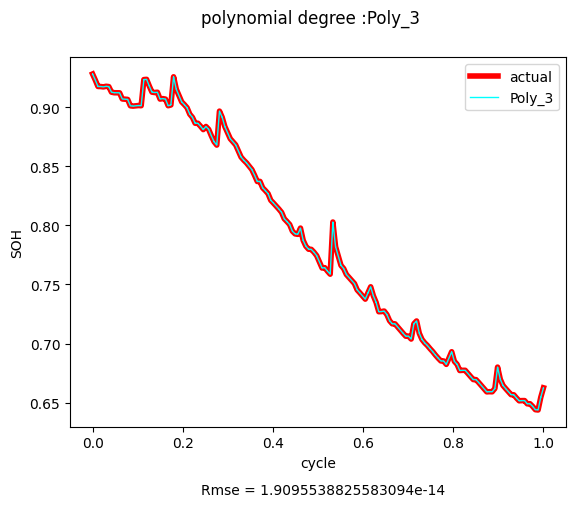

1.9095538825583094e-14


In [31]:
graph_plot(y_pred_3,"Poly_3")

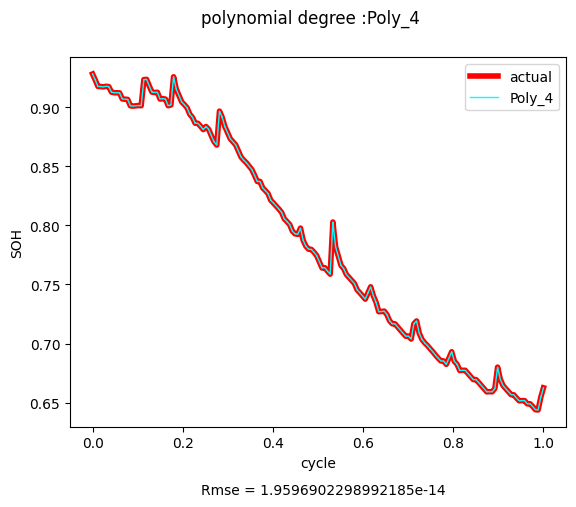

1.9596902298992185e-14


In [32]:
graph_plot(y_pred_4,"Poly_4")

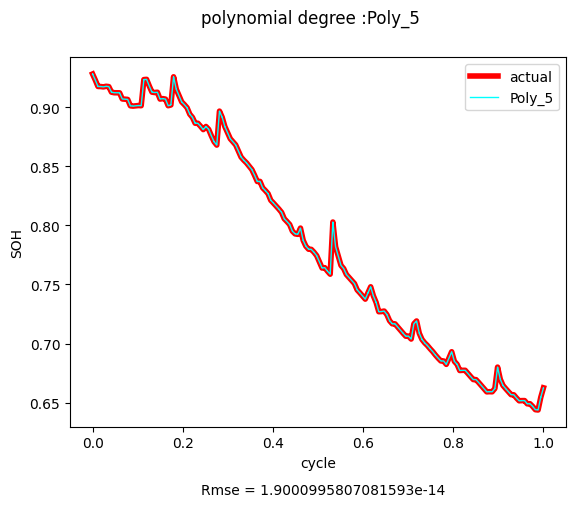

1.9000995807081593e-14


In [33]:
graph_plot(y_pred_5,"Poly_5")